<a href="https://colab.research.google.com/github/Husted42/DatabasesAndInformationSystems/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Task 1

Weekly data for the stocks

In [ ]:
#AXP=American Express, MCD=McDonalds, GOOG=Google, XOM=Exxon Mobli Corp., IBM=IBM, NKE=Nike, WMT=Walmart, KO=Coca-Cola
stonks_tickers = ["AXP", "MCD", "GOOG", "XOM", "IBM", "NKE", "WMT", "KO"]
stonks_pd = yf.download(stonks_tickers, "2007-01-01","2013-01-01", progress=False, interval="1wk")["Adj Close"]
stonks_pd["MCD"]

,MCD
Date,
2007-01-01 00:00:00+00:00,26.491846
2007-01-08 00:00:00+00:00,26.905588
2007-01-15 00:00:00+00:00,27.264574
2007-01-22 00:00:00+00:00,26.120687
2007-01-29 00:00:00+00:00,27.100302
...,...
2012-12-03 00:00:00+00:00,64.611481
2012-12-10 00:00:00+00:00,64.903557
2012-12-17 00:00:00+00:00,65.852859


In [ ]:
log_returns_stonks = np.log((stonks_pd / stonks_pd.shift(1))[1:])
log_returns_stonks

Ticker,AXP,GOOG,IBM,KO,MCD,NKE,WMT,XOM
Date,,,,,,,,
2007-01-08 00:00:00+00:00,0.000444,0.035904,0.019517,0.005991,0.015497,0.009366,0.012373,-0.007951
2007-01-15 00:00:00+00:00,-0.015714,-0.030663,-0.032430,-0.005991,0.013254,0.001803,0.006854,0.011902
2007-01-22 00:00:00+00:00,-0.004140,0.012358,0.013221,-0.008950,-0.042861,-0.048590,-0.013336,0.001088
2007-01-29 00:00:00+00:00,0.005345,-0.029347,0.017496,0.008535,0.036817,0.051188,0.008564,0.025882
2007-02-05 00:00:00+00:00,-0.010892,-0.041579,-0.006272,-0.010000,0.000448,0.033369,-0.002291,-0.004245
...,...,...,...,...,...,...,...,...
2012-12-03 00:00:00+00:00,0.012621,-0.020484,0.009843,0.001285,0.025348,0.011323,0.003742,0.005205
2012-12-10 00:00:00+00:00,0.000706,0.025612,-0.000991,-0.001327,0.004510,-0.012878,-0.044675,-0.005886
2012-12-17 00:00:00+00:00,0.017498,0.019287,0.008620,-0.020658,0.014520,0.081130,-0.001455,-0.009697


Weekly data for S&P500

In [ ]:
'''
  ^GSPC : Markets are always wegihted correctly, but it uses closing prices, so we do not take dividents into an account
  SPX   : That is the actual fond, and not just a formular the markets weights are only adjusted every 3 month
'''

market_tickers = ["^GSPC"] #^GSPC=S&P500 market or SPX=S&P500 Index
market_pd = yf.download(market_tickers, "2007-01-01","2013-01-01", progress=False, interval="1wk")["Adj Close"]
market_pd

Ticker,^GSPC
Date,
2007-01-01 00:00:00+00:00,1409.709961
2007-01-08 00:00:00+00:00,1430.729980
2007-01-15 00:00:00+00:00,1430.500000
2007-01-22 00:00:00+00:00,1422.180054
2007-01-29 00:00:00+00:00,1448.390015
...,...
2012-12-03 00:00:00+00:00,1418.069946
2012-12-10 00:00:00+00:00,1413.579956
2012-12-17 00:00:00+00:00,1430.150024


## Task 1.1
Calculate the market continuous returns, and the expectation of yearly return and variance (Use the S&P 500 as ‘the market’).

In [ ]:
# We calculate the yearly expected return based on as many datapoins as possiblee
log_returns_market = np.log((market_pd / market_pd.shift(1))[1:])
print("Mean: ", log_returns_market["^GSPC"].mean() * 52)
print("Variance: ", log_returns_market["^GSPC"].var() * 52)

Mean:  0.0019308995686954046
Variance:  0.04936264190674842


## Task 1.2
Use linear regression to estimate $\beta_i, \alpha_i$ and $\sigma_{ei}^2$ for each of the stocks.

In [ ]:
alpha_list = []
beta_list = []
lst_var_ei = []

for ticker in stonks_tickers:
    slope, intercept = np.polyfit(log_returns_market["^GSPC"], log_returns_stonks[ticker], 1)
    beta_list.append(slope)
    alpha_list.append(intercept)

    print(ticker, "\nParameters : ", round(slope, 5), round(intercept, 5))
    e_i = log_returns_stonks[ticker] - slope * log_returns_market["^GSPC"] - intercept
    mean_ei = e_i.mean()
    var_ei = (e_i ** 2).mean()
    lst_var_ei.append(var_ei)
    print('e_i        : ', round(mean_ei, 5), round(var_ei, 5), "\n")

AXP 
Parameters :  1.54179 0.0002
e_i        :  -0.0 0.00146 

MCD 
Parameters :  0.50774 0.00282
e_i        :  0.0 0.00047 

GOOG 
Parameters :  0.96377 0.00116
e_i        :  0.0 0.00109 

XOM 
Parameters :  0.79309 0.00093
e_i        :  -0.0 0.00046 

IBM 
Parameters :  0.82296 0.00246
e_i        :  0.0 0.00053 

NKE 
Parameters :  0.95557 0.00261
e_i        :  -0.0 0.00095 

WMT 
Parameters :  0.50052 0.00157
e_i        :  -0.0 0.00054 

KO 
Parameters :  0.55181 0.00184
e_i        :  0.0 0.00043 



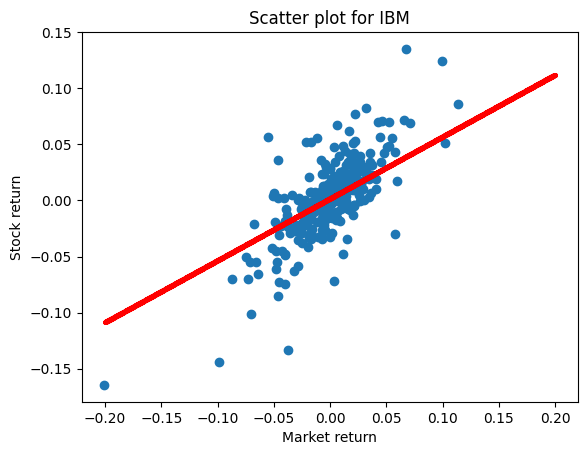

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(log_returns_market["^GSPC"], log_returns_stonks["IBM"])

# Plot the line and scatter points
x_fit = np.linspace(-.2, .2, 10000)
y_fit = slope * x_fit + intercept

ax.title.set_text('Scatter plot for IBM')
ax.set_xlabel('Market return')
ax.set_ylabel('Stock return')

scatter = ax.scatter(x_fit, y_fit, c='red', s = 5)

## Task 1.3
Calculate the real yearly co-variance matrix of the continuous stock returns.

In [ ]:
# Real covariance matrix
c_real = 52 * log_returns_stonks.cov()
c_real

Ticker,AXP,GOOG,IBM,KO,MCD,NKE,WMT,XOM
Ticker,,,,,,,,
AXP,0.193622,0.065855,0.059744,0.034141,0.036810,0.072252,0.032435,0.050676
GOOG,0.065855,0.102462,0.043271,0.024145,0.023823,0.041800,0.017071,0.038915
IBM,0.059744,0.043271,0.060899,0.021692,0.021441,0.041395,0.019929,0.030960
KO,0.034141,0.024145,0.021692,0.037465,0.018118,0.027097,0.018083,0.024650
MCD,0.036810,0.023823,0.021441,0.018118,0.037105,0.031507,0.017374,0.022344
NKE,0.072252,0.041800,0.041395,0.027097,0.031507,0.094489,0.030264,0.032122
WMT,0.032435,0.017071,0.019929,0.018083,0.017374,0.030264,0.040457,0.021606
XOM,0.050676,0.038915,0.030960,0.024650,0.022344,0.032122,0.021606,0.055189


In [ ]:
c_estimate = np.zeros((len(stonks_tickers), len(stonks_tickers)))

for i in range(len(stonks_tickers)):
  for j in range(len(stonks_tickers)):
    c_estimate[i][j] = beta_list[i] * beta_list[j] * log_returns_market["^GSPC"].var()

pd.DataFrame(c_estimate)

,0,1,2,3,4,5,6,7
0,0.002257,0.000743,0.001411,0.001161,0.001204,0.001399,0.000733,0.000808
1,0.000743,0.000245,0.000465,0.000382,0.000397,0.000461,0.000241,0.000266
2,0.001411,0.000465,0.000882,0.000726,0.000753,0.000874,0.000458,0.000505
3,0.001161,0.000382,0.000726,0.000597,0.000620,0.000719,0.000377,0.000415
4,0.001204,0.000397,0.000753,0.000620,0.000643,0.000747,0.000391,0.000431
5,0.001399,0.000461,0.000874,0.000719,0.000747,0.000867,0.000454,0.000501
6,0.000733,0.000241,0.000458,0.000377,0.000391,0.000454,0.000238,0.000262
7,0.000808,0.000266,0.000505,0.000415,0.000431,0.000501,0.000262,0.000289


## Task 1.4
Calculate the expected return and variance of the equally weighted portfolio (same holding in each of the assets). One is based on the real estimation and the other one based on the single index model.

In [ ]:
# The real values
portfolio = np.array([1/len(stonks_tickers)] * len(stonks_tickers))
portfolio

portfolio_return = np.dot(portfolio, 52*log_returns_stonks.mean())
portfolio_var = np.dot(np.array(portfolio).T, np.dot(52*log_returns_stonks.cov(), portfolio))

print(portfolio_return, portfolio_var)

0.08990258026995736 0.03844886777967306


In [ ]:
expected_return = np.zeros(len(stonks_tickers))
var = np.zeros(len(stonks_tickers))

for i in range(len(stonks_tickers)):
  # Notice that alpha and beta is on a weekly
  expected_return[i] = alpha_list[i]  + beta_list[i] * log_returns_market["^GSPC"].mean()
  var[i] = beta_list[i] ** 2 * log_returns_market["^GSPC"].var() + lst_var_ei[i]
print("\nParameters : \n", expected_return, '\n', var, "\n")

expected_portfolio_return = np.dot(portfolio, expected_return)
expected_portfolio_var = np.dot(np.array(portfolio).T, np.dot(c_estimate, portfolio))

print(expected_portfolio_return * 52, expected_portfolio_var * 52)


Parameters : 
 [0.0002591  0.00283865 0.00119142 0.00096174 0.00249081 0.00264333
 0.00158574 0.00186037] 
 [0.00371881 0.00071207 0.00196694 0.00105985 0.00116944 0.00181405
 0.00077629 0.00071911] 

0.0899025802699574 0.033977777412986396
